In [1]:
print("hi")

hi


In [2]:
# Heart Disease Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:


# Load the dataset
print("Loading Heart Disease Dataset...")
df = pd.read_csv('../data/heart_disease.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())



Loading Heart Disease Dataset...
Dataset shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
# Check for missing values
print(f"\nMissing values per column:")
print(df.isnull().sum())

# Data types
print(f"\nData types:")
print(df.dtypes)

# Basic statistics
print(f"\nBasic statistics:")
print(df.describe())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Basic statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.973597  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032243   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000   

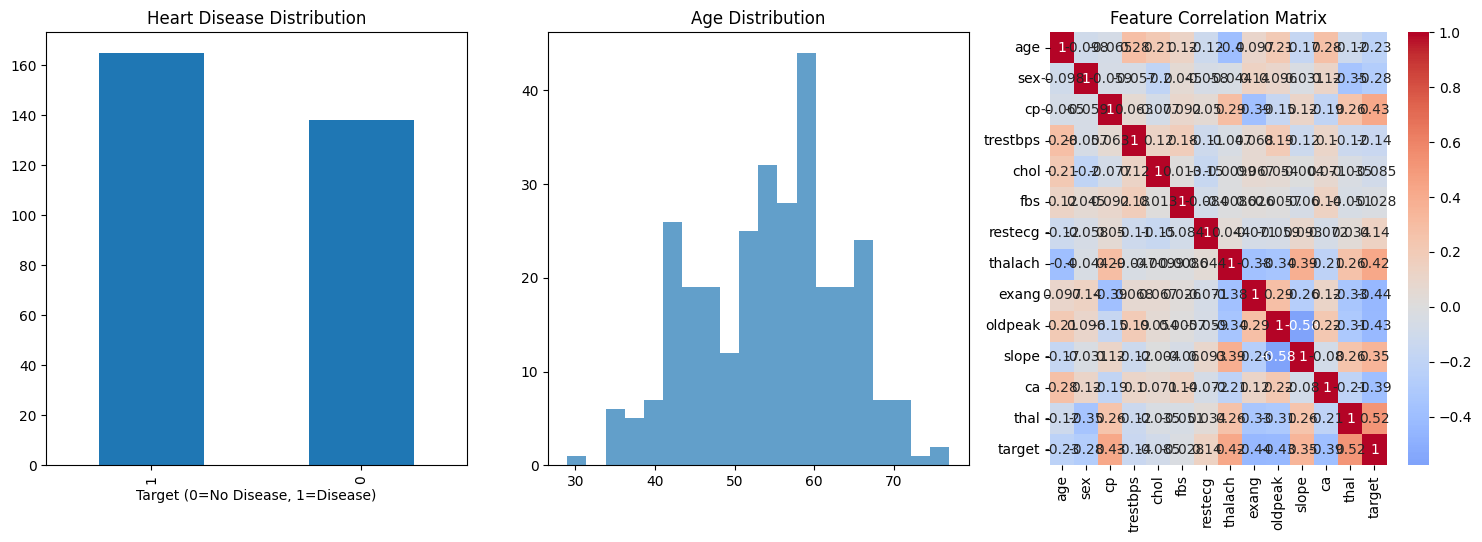

In [7]:

# Handle missing values (if any)
# Example: df.fillna(df.median(), inplace=True)  # for numerical
# Example: df.fillna(df.mode().iloc[0], inplace=True)  # for categorical

# Exploratory Data Analysis
plt.figure(figsize=(15, 10))

# 1. Target variable distribution
plt.subplot(2, 3, 1)
df['target'].value_counts().plot(kind='bar')
plt.title('Heart Disease Distribution')
plt.xlabel('Target (0=No Disease, 1=Disease)')

# 2. Age distribution
plt.subplot(2, 3, 2)
plt.hist(df['age'], bins=20, alpha=0.7)
plt.title('Age Distribution')

# 3. Correlation heatmap
plt.subplot(2, 3, 3)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

In [8]:
# Encode categorical variables if needed
# le = LabelEncoder()
# df['categorical_column'] = le.fit_transform(df['categorical_column'])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'target' in numerical_columns:
    numerical_columns.remove('target')

df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Data preprocessing completed!")
print(f"Processed dataset shape: {df_scaled.shape}")

# Save cleaned dataset
df_scaled.to_csv('../results/cleaned_dataset.csv', index=False)
print("✔️ Cleaned dataset saved to results/cleaned_dataset.csv")

Data preprocessing completed!
Processed dataset shape: (303, 14)
✔️ Cleaned dataset saved to results/cleaned_dataset.csv
